In [63]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDClassifier
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [64]:
df = pd.read_csv('spambase.csv', header = None)
df = df.sample(frac=1).reset_index(drop = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,1.833,5,11,0
1,0.28,0.00,0.28,0.0,0.00,0.28,0.28,0.28,0.28,1.15,...,0.0,0.000,0.000,0.554,0.221,0.166,5.328,140,341,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,1.466,6,22,0
3,0.00,0.87,0.87,0.0,0.00,0.00,0.00,0.00,0.00,0.87,...,0.0,0.000,0.000,0.000,0.138,0.000,2.136,21,47,0
4,0.00,0.54,0.00,0.0,0.54,0.00,0.00,0.00,0.00,0.00,...,0.0,0.182,0.091,0.091,0.000,0.000,1.212,5,40,0


In [74]:
#1/3 data for testing
test_data = df[-df.shape[0]//3:]
test_data_feature = test_data[np.r_[0:57]]
test_data_label = test_data[57]
#2/3 data for training
train_data = df[:-df.shape[0]//3]
train_data_feature = train_data[np.r_[0:57]]
train_data_label = train_data[57]

In [66]:
# use Stochastic Gradient Descent(SGD) to train the model
classify_model = SGDClassifier(loss="hinge", penalty="l2",learning_rate='constant',eta0=0.001)
classify_model.fit(train_data_feature,train_data_label)
predict = classify_model.predict(test_data_feature)

tot,err=0,0
for pred,truth in zip(predict,test_data_label.tolist()):
    if pred!=truth:
        err+=1
    tot+=1
print('testing error rate: {:.2%}'.format(err/tot))

testing error rate: 39.05%


/Users/ming/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [76]:
#i got 39.05% error rate before normalization
#next, change different learning rate to see the error rate change

In [77]:
err_tab=[]
test_rate = [0.0002,0.001,0.005,0.025,0.125,0.725,]
for rate in test_rate:
    classify_model = SGDClassifier(loss="hinge", penalty="l2",learning_rate='constant',eta0=rate,max_iter=1000,tol=None)
    classify_model.fit(train_data_feature,train_data_label)
    predict = classify_model.predict(test_data_feature)
    tot,err=0,0
    for pred,truth in zip(predict,test_data_label.tolist()):
        if pred!=truth:
            err+=1
        tot+=1
    err_tab+=[err/tot]
    print('Before normalization, testing error rate: {:.2%}'.format(err/tot))

Before normalization, testing error rate: 6.71%
Before normalization, testing error rate: 6.65%
Before normalization, testing error rate: 6.45%
Before normalization, testing error rate: 8.47%
Before normalization, testing error rate: 8.74%
Before normalization, testing error rate: 9.06%


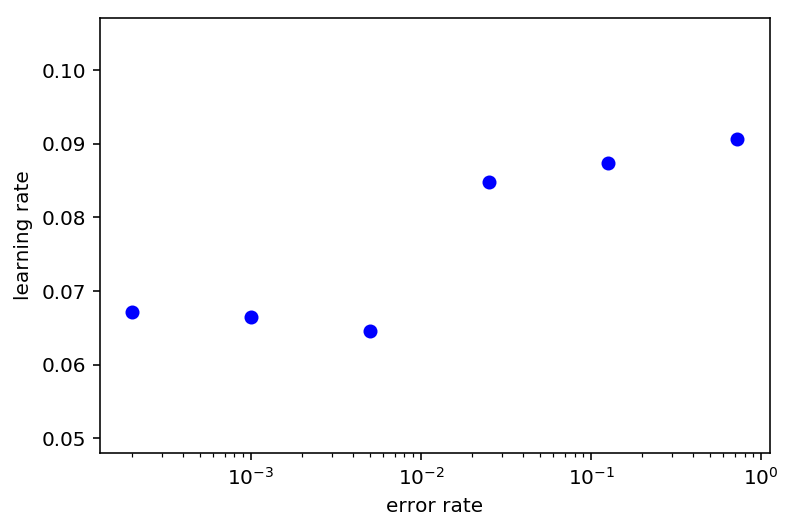

In [78]:
plt.xscale(('log'))
plt.scatter(test_rate, err_tab, color="blue")
plt.ylabel("learning rate")
plt.xlabel("error rate")

In [79]:
#Normalize data

In [80]:
feature_index = np.r_[0:57]
scaled_features = {}
for each in feature_index:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,-0.329876,-0.308321,-0.103037,-0.105849,-0.242047,-0.449064,0
1,0.574561,-0.165054,-0.001302,-0.046894,-0.464264,0.672326,0.423543,0.435597,0.681701,1.412298,...,-0.158436,-0.514251,-0.155181,0.349318,0.590484,0.283601,0.004302,0.450647,0.095178,1
2,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,-0.329876,-0.308321,-0.103037,-0.117415,-0.236916,-0.430923,0
3,-0.342396,0.509064,1.169001,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,0.978025,...,-0.158436,-0.514251,-0.155181,-0.329876,0.252923,-0.103037,-0.096299,-0.159950,-0.389693,0
4,-0.342396,0.253364,-0.556700,-0.046894,0.338695,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,0.158937,0.676673,-0.218312,-0.308321,-0.103037,-0.125420,-0.242047,-0.401237,0


In [81]:
# 1/3 data for test
test_data = df[-df.shape[0]//3:]
test_data_feature = test_data[np.r_[0:57]]
test_data_label = test_data[57]
# 2/3 data for train
train_data = df[:-df.shape[0]//3]
train_data_feature = train_data[np.r_[0:57]]
train_data_label = train_data[57]

In [82]:
# use Stochastic Gradient Descent(SGD) to train the model
classify_model = SGDClassifier(loss="hinge", penalty="l2",learning_rate='constant',eta0=0.001)
classify_model.fit(train_data_feature,train_data_label)
predict = classify_model.predict(test_data_feature)

tot,err=0,0
for pred,truth in zip(predict,test_data_label.tolist()):
    if pred!=truth:
        err+=1
    tot+=1
print('After normalization, testing error rate: {:.2%}'.format(err/tot))

After normalization, testing error rate: 6.78%


/Users/ming/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [83]:
#In sum, after doing normalization, the data error rate lowered 1%